Importing Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from pandas_datareader import data
from scipy.optimize import linprog
from cvxopt import matrix, solvers
from scipy import stats
!pip install yahoo-fin
import yahoo_fin.stock_info as si



  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 4.7 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=3e324849cf3a28a3bde83e94ea13dffe6b34a18e1d257805f92d1a0586cb3ff2
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built sgmllib3k
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.3
    Uninstalling urllib3-2.2.3:
      Successfully uninstalled urllib3-2.2.3


Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


. Downloading Stock Data  

Here, stock prices are downloaded for a list of tickers using yfinance and the adjusted close prices are stored in a DataFrame:

In [3]:
stocks = ['MSFT', 'AAPL', 'INTC', 'NVDA', 'AMZN', 'WMT', 'COST', 'TSLA', 'GOOG', 'META', 'JPM', 'BAC', 'GS', 'JNJ', 'PFE', 'BIIB', 'XOM', 'CVX', 'BA', 'MMM']
stocks.sort()

# Download stock data and drop any rows with missing data
data = yf.download(" ".join(stocks), start="2017-01-01", end="2021-12-14")['Adj Close']
data.dropna(axis=0, how='any', inplace=True)
# Convert to DataFrame
df = pd.DataFrame(data)

[*********************100%***********************]  20 of 20 completed


Plotting Stock Prices

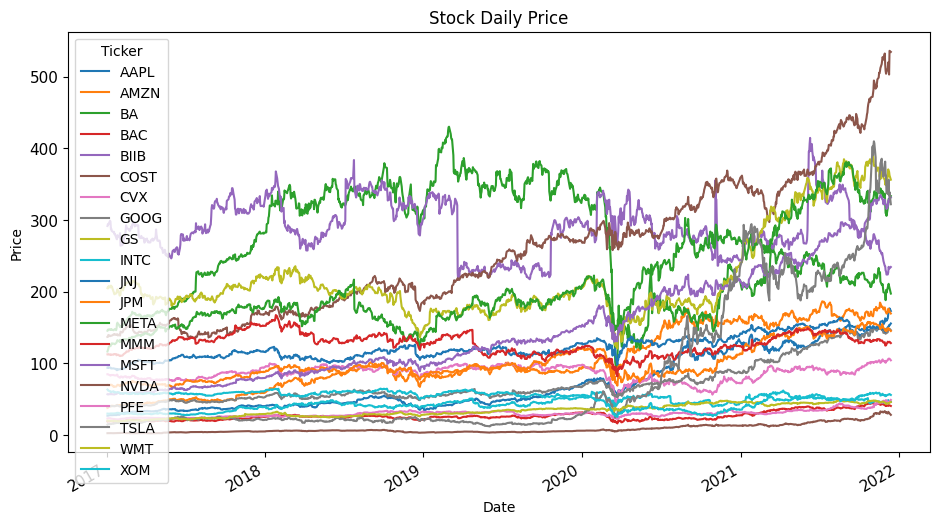

In [ ]:
ax = df.plot(title="Stock Daily Price", fontsize=11, figsize=(9.5, 5.5))
ax.set_xlabel("Date")
ax.set_ylabel("Price")
plt.tight_layout()

Calculating and Plotting Log Returns

Log returns for the stock prices are calculated and plotted to visualize daily returns:

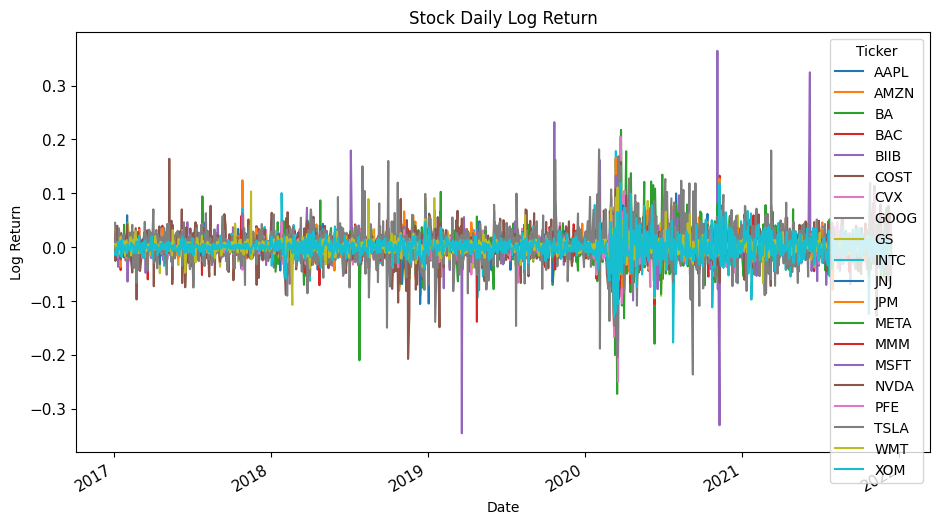

In [ ]:
r = np.log(data / data.shift(1)).dropna()
ax = r.plot(title="Stock Daily Log Return", fontsize=11, figsize=(9.5, 5.5))
ax.set_xlabel("Date")
ax.set_ylabel("Log Return")
plt.tight_layout()

 Data Envelopment Analysis (DEA) Functions
Two functions are defined to calculate efficiency scores for Data Envelopment Analysis (DEA):

DMU_efficiency(): This function calculates the efficiency score using a specific constraint where the denominator equals 1.
DMU_efficiency_num(): This function calculates the efficiency score with the numerator fixed to 1.

In [ ]:
def DMU_efficiency(I, O):
    # Code to calculate the efficiency score
    pass

def DMU_efficiency_num(I, O):
    # Code to calculate the efficiency score with numerator fixed to 1
    pass

 Fundamental Analysis
This section extracts financial ratios for the selected stocks using the yahoo_fin package:

In [ ]:
Fundamental_criteria = ['ROE', 'Asset TurnOver Ratio', '(Diluted) EPS', 'Profit Margin', 'Operating Margin', 'Current Ratio', 'Earnings Growth (Quarterly)']
df_fa = pd.DataFrame(columns=Fundamental_criteria, index=stocks)

def asset_turnover_ratio(bs, second_bs, income_statement):
    revenue = income_statement.loc["totalRevenue"][0]
    avg_total_assets = (bs.loc["totalAssets"][0] + second_bs.loc["totalAssets"][0]) / 2
    return round(revenue / avg_total_assets, 3)

for ticker in stocks:
    # Retrieve and calculate financial ratios for each stock
    pass

Descriptive Information and Correlation Matrix
The log returns are used to calculate the mean, standard deviation, skewness, and kurtosis. The correlation matrix of stock returns is also computed and visualized:

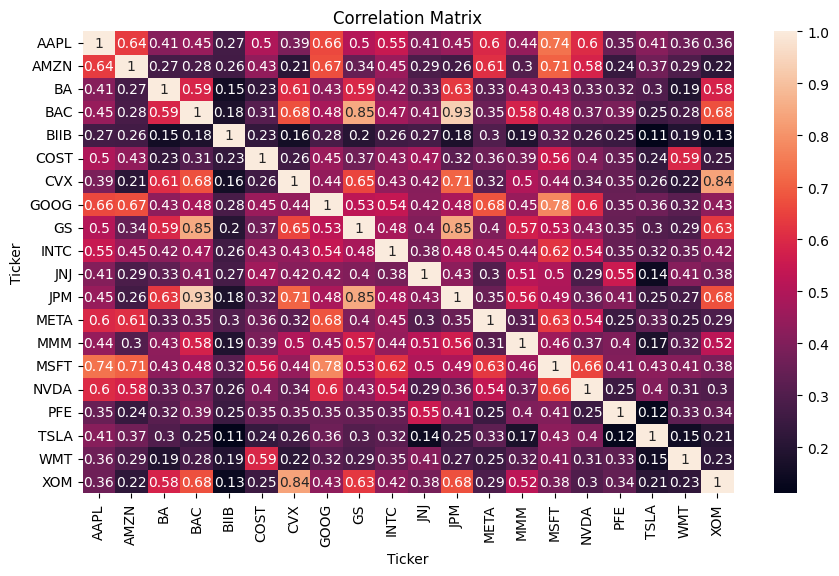

In [ ]:
des_info = pd.DataFrame([round(r.mean()*252,4), round(r.std()*np.sqrt(252),4), round(r.skew(),4), round(r.kurtosis(),4)]).T
des_info.columns = ['Annualized Mean', 'Annualized Std', 'Skew', 'Kurtosis']

# Plot correlation matrix
def plot_corr(corr):
    plt.figure(figsize=(10.5,6))
    sns.heatmap(corr, annot=True)
    plt.title("Correlation Matrix")
plot_corr(r.corr())

Efficient Frontier Calculations
Three optimization approaches are defined:

Minimum Variance Optimization: Finds the portfolio with the least volatility.
Mean Variance Optimization: Finds the optimal portfolio based on a specified return.
Maximum Sharpe Ratio Optimization: Finds the portfolio with the highest Sharpe ratio.

In [ ]:
def min_var(ret, cov):
    # Minimum variance portfolio optimization
    pass

def mean_var(ret, cov):
    # Mean-variance optimization
    pass

def msr(ret, cov, riskfree_rate):
    # Maximum Sharpe Ratio optimization
    pass

Efficient Frontier and Portfolio Optimization
This block generates portfolios along the efficient frontier and plots the results:

In [ ]:
# Generate random portfolios and plot the efficient frontier
def port_ef(ret, cov, port_num=10000, risk_free=0):
    # Generate and evaluate portfolios
    pass

port_df = port_ef(eff_annual_ret, eff_annual_cov)
plt.scatter(port_df['Portfolio Volatility'], port_df['Portfolio Return'], c=port_df['Sharpe Ratio'], marker='o', s=50, alpha=0.3)
plt.title('Portfolio Efficient Frontier')

NameError: name 'eff_annual_ret' is not defined

 Benchmark Comparison (S&P 500)
Finally, a comparison is made to the S&P 500, calculating the annualized return, volatility, and Sharpe ratio:

In [ ]:
bm_mean = benchmark['^GSPC'].mean() * 252
bm_std = np.sqrt(benchmark['^GSPC'].var() * 252)
sr = bm_mean / bm_std

NameError: name 'benchmark' is not defined

Monte Carlo Simulation
A Monte Carlo simulation is performed to estimate potential future portfolio performance:

In [ ]:
def MC(ret, cov, weight, nrep=100, ndays=252):
    # Monte Carlo simulation to calculate expected returns
    pass